   pclass  survived                                             name     sex  \
0     1.0       1.0                    Allen, Miss. Elisabeth Walton  female   
1     1.0       1.0                   Allison, Master. Hudson Trevor    male   
2     1.0       0.0                     Allison, Miss. Helen Loraine  female   
3     1.0       0.0             Allison, Mr. Hudson Joshua Creighton    male   
4     1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000    0.0    0.0   24160  211.3375       B5        S    2    NaN   
1   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

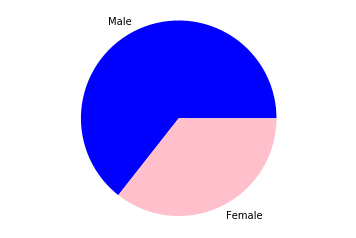

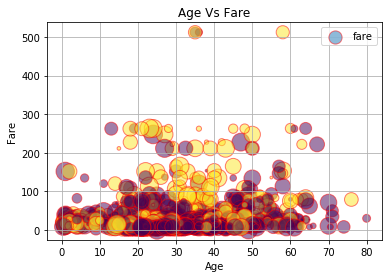

In [43]:
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

class DLProgress(tqdm):
    last_block= 0
    
    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total= total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block= block_num
        
        
if not isfile('titanic_original.csv'):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='Titanic Dataset') as pbar:
        urlretrieve('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv','titanic_original.csv',pbar.hook)

titanic = pd.read_csv('titanic_original.csv')
                    
print(titanic.head()) 

#titanic.dropna(axis=1, how='any', inplace = True)

print(titanic["sex"].unique())

res = titanic['sex'].value_counts()
male_count = res[0]
female_count = res[1]
labels = 'Male', 'Female'
sizes = [male_count, female_count]

fig1, ax1 = plt.subplots()
colors = ['blue', 'pink']
ax1.pie(sizes, labels = labels, colors = colors)
ax1.axis('equal')
plt.show()


x= titanic['age']
y= titanic['fare']
s= titanic['sex']
titanic['sex'] = titanic['sex'].map({'male':0, 'female':1})
s= titanic['sex']
labels = ['Age', 'Fare']
r = np.random.random(len(x))
#make color a function of gender
c = r + 400 * s
sizes = 350 * r


fig2, ax2 = plt.subplots()
ax2.scatter(x, y, c=c, alpha=0.5, s = sizes, edgecolors = 'red')
ax2.legend()
ax2.grid(True)
plt.title("Age Vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare");
plt.show()
                    
